# ImmoEliza - Data Modelling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px

In [2]:
df = pd.read_csv('../data/saved_data.csv', index_col=0)

In [3]:
df

,Price,Address,Bedrooms,Energy class,Primary energy consumption,Furnished,Terrace,Terrace surface,Surface of the plot,Living room surface,...,Toilets,Kitchen type,Heating type,immo_code,Postcode,Price2,Price_orig,Terrace2,Province,Region
0,469000,Heidestatiestraat 26,3,D,390,0,1,0,760,34,...,2,Installed,0,10666428,2910,469000,€469000,1,Antwerpen,Flanders
1,1395000,"Rue de Wavre, 27",5,C,178,0,1,60,6468,50,...,4,Hyper equipped,Fuel oil,10666426,1301,1395000,€1395000,1,Brabant wallon,Wallonia
2,285000,Avenue de Longwy 340,2,D,299,0,0,0,0,0,...,2,Installed,Electric,10666424,6700,285000,€285000,0,Luxembourg,Wallonia
3,285000,Avenue de Longwy 340,2,D,299,0,0,0,0,0,...,2,Installed,Electric,10666423,6700,285000,€285000,0,Luxembourg,Wallonia
4,425000,"Grote steenweg, 511",2,C,254,0,1,4,0,40,...,0,Installed,0,10666422,2000,425000,€425000,1,Antwerpen,Flanders
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7856,465000,Bisschopslaan 16,2,B,189,0,1,0,1221,45,...,2,Hyper equipped,Gas,10642965,2460,465000,€465000,1,Antwerpen,Flanders
7857,499000,Schrieksebaan 53B001,3,D,383,0,1,0,17656,0,...,2,Installed,0,10642957,3120,499000,€499000,1,Vlaams-Brabant,Flanders
7858,1199000,Donksesteenweg 212,6,B,199,0,1,0,2790,0,...,3,Installed,Gas,10642946,2970,1199000,€1199000,1,Antwerpen,Flanders
7859,340000,Markeplaats 9,4,B,161,0,1,0,621,0,...,0,0,0,10642937,8560,340000,€340000,1,West-Vlaanderen,Flanders


In [4]:
df.shape

(7861, 27)

### pastebin:

'Bedrooms',
 'Furnished',
 'Terrace',
 'Terrace surface',
 'Surface of the plot',
 'Living room surface',
 'Number of frontages',
 'Construction year',
 'Outdoor parking space',
 'Bathrooms',
 'Shower rooms',
 'Office',
 'Toilets'


 df.drop(columns=['Price', 'Address',
 'Energy class',
 'Primary energy consumption',
 'Building condition',
 'Kitchen type',
 'Heating type',
 'Price_orig',
 'Province',
 'Region']).to_numpy()

### Define model variables

In [11]:
#X = np.array(df['Bedrooms'])
#int_columns=['Bedrooms', 'Furnished', 'Terrace', 'Terrace surface', 'Surface of the plot', 'Living room surface', 'Number of frontages', 'Construction year', 'Outdoor parking space', 'Bathrooms', 'Shower rooms', 'Office', 'Toilets']
#int_columns=['Bedrooms', 'Terrace', 'Terrace surface', 'Surface of the plot', 'Living room surface', 'Number of frontages', 'Construction year', 'Outdoor parking space', 'Bathrooms', 'Shower rooms', 'Office', 'Toilets']
int_columns=["Bedrooms", "Bathrooms", "Toilets"]
X = df[int_columns].to_numpy()
#x_1 = df.drop(columns=["x_2","y"]).to_numpy()
#x_2 = df.drop(columns=["x_1","y"]).to_numpy()
y = df.Price.to_numpy().reshape(-1,1)
print(type(X))
print(X)


<class 'numpy.ndarray'>
[[3 1 2]
 [5 2 4]
 [2 2 2]
 ...
 [6 2 3]
 [4 0 0]
 [2 2 4]]


C:\Users\freva\AppData\Local\Temp\ipykernel_8340\2960525173.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cropped_df["Price"] = df["Price"]


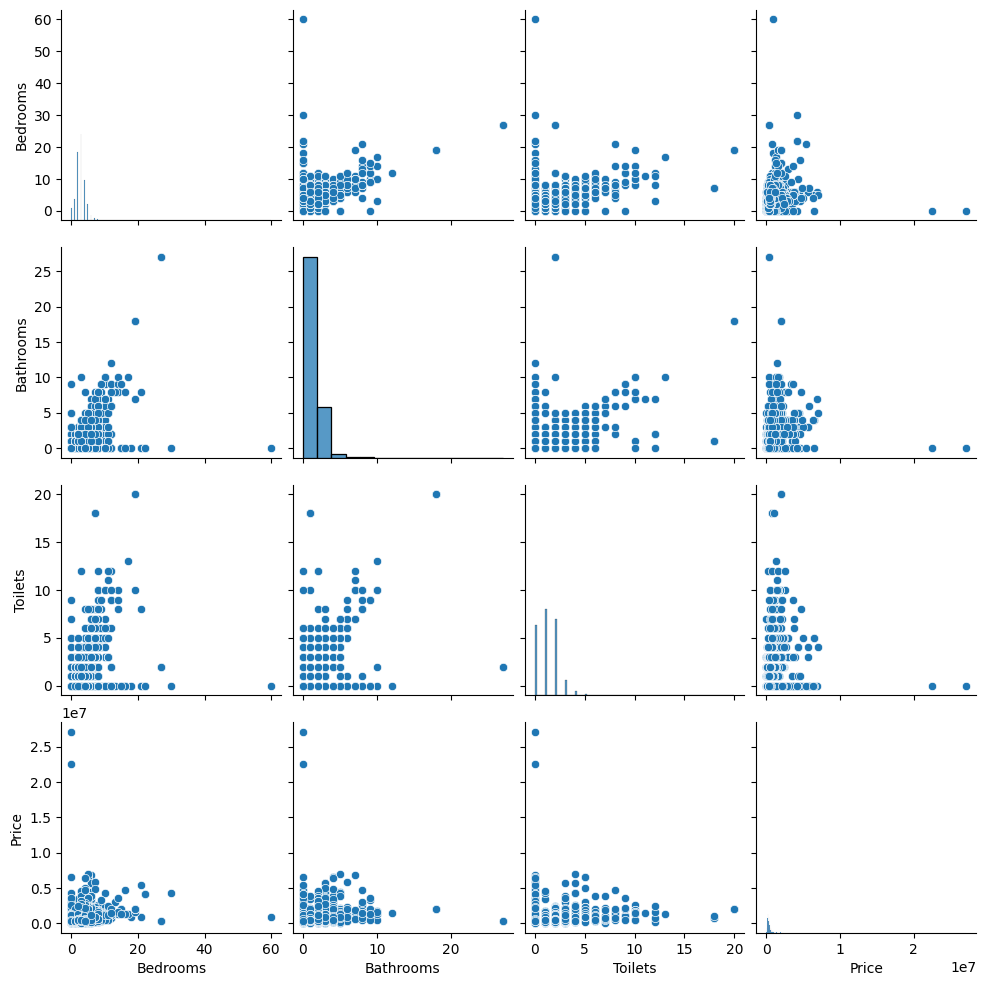

In [12]:
cropped_df = df[int_columns]
cropped_df["Price"] = df["Price"]
#display(cropped_df)
#sns.pairplot(data=df, y_vars = "Price", x_vars = int_columns, height=5)
sns.pairplot(data=cropped_df)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [14]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (6288, 3)
Shape of X_test:  (1573, 3)
Shape of y_train:  (6288, 1)
Shape of y_test:  (1573, 1)


##  Load and fit the model (with Sklearn)

How to use `sklearn` now with multiple features ? Well, it's simple, you don't change anything. `sklearn` takes care of everything for you.

1. Import `LinearRegression` from `sklearn`
2. Create a `regressor` variable and instantiate your `LinearRegression` class.
3. Train your model with `X_train` and `y_train`.
4. Display the score of your model with `X_train` and `y_train`.
5. Use the predict method of your model on your test dataset (`X_test`).
6. Display the score of your model with `X_test` and `y_test`.

In [15]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
"""X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)"""
regressor.fit(X_train, y_train)

LinearRegression()

In [16]:
regressor.score(X_train, y_train)

0.09398257430904355

In [17]:
regressor.predict(X_test)

array([[569795.4436538 ],
       [440938.74138641],
       [492648.6244462 ],
       ...,
       [389228.85832663],
       [618954.49756407],
       [520636.38974353]])

In [18]:
regressor.score(X_test,y_test)

0.08209604648912061

In [ ]:
from sklearn.metrics import mean_squared_error


And voilà !

## From Scratch 
You will see that with matrices, it doesn't change much in the way of proceeding. Matrix writing, moreover, remains the same as simple regression. 

### Transform to matrix

$$
\\ Y = X \cdot \theta \\
$$
The $Y$ vector is the same too
$$ Y =
\begin{bmatrix}
y^{(1)}\\
y^{(2)}\\
y^{(3)}\\
... \\
y^{(m)}\\
\end{bmatrix}
$$

The $X$ matrix will have as many dimensions as there are features +1  (n+1)

$$ X =
\begin{bmatrix}
x^{(1)}_1, x^{(1)}_2, ..., x^{(m)}_{n}, 1\\
x^{(2)}_1, x^{(2)}_2, ..., x^{(m)}_{n}, 1\\
x^{(3)}_1, x^{(3)}_2, ..., x^{(m)}_{n}, 1\\
x^{(m)}_1,x^{(m)}_2, ..., x^{(m)}_{n}, 1\\
\end{bmatrix}
$$

The theta vector will have as many lines as there are parameters +1 (for the constant). 
$$ \theta =
\begin{bmatrix}
a\\
b\\
c\\
... \\
\end{bmatrix}
$$

For our case with our dataset, we can write it like this: 

$$
\begin{bmatrix}
y^{(1)}\\
y^{(2)}\\
y^{(3)}\\
... \\
y^{(m)}\\
\end{bmatrix}
=
\begin{bmatrix}
x^{(1)}_1, x^{(1)}_2, 1\\
x^{(2)}_1, x^{(2)}_2, 1\\
x^{(3)}_1, x^{(3)}_2, 1\\
x^{(m)}_1,x^{(m)}_2,  1\\
\end{bmatrix}
\cdot
\begin{bmatrix}
a\\
b\\
c\\
\end{bmatrix}
$$

**Exercise :** Create a variable `X` which contains a matrix of shape `(100,3)` with two column's filled with values of our dataframe and then another one with 1's.

In [22]:
features = df.drop(columns=["y"]).to_numpy()
ones = np.ones((X.shape[0],1))
X = np.hstack((features, ones))

**Exercise :** Check that your matrix is of shape `(100,3)`. 

In [25]:
X.shape

(100, 3)

**Exercise :** Create the theta vector with three random values. Your vector must be of shape 
`(3,1)`.

In [36]:
np.random.seed(5)
theta = np.random.randn(3,1)
print(theta)
theta.shape

[[ 0.44122749]
 [-0.33087015]
 [ 2.43077119]]


(3, 1)

## Create and fit the model
### Define your model

**Exercise :** Create a `model` function that receives as parameter `X` and `theta`. The function must return the computed predictions `y_pred`. This is exactly the same model as last time. 

In [37]:
def model(X, theta):
    F = X.dot(theta)
    return F

y_pred = model(X,theta)
print("Shape of y_pred : ", y_pred.shape)


Shape of y_pred :  (100, 1)


### Cost function

Well we have the model, the $\theta$ vector, the $X$ matrix. What are we missing? The cost function of course!
And you know what? This too is exactly the same MSE function from last time. 

$$MSE(\theta) = \frac {1}{2m}  \sum (X \cdot \theta - Y)^2$$

**Exercise :** Create a MSE function that receives as parameters `X`, `y` and `theta` using the example above.

In [38]:
def MSE(X,y,theta):
    y_pred = model(X,theta)
    return 1/(2*len(y)) * np.sum(y_pred - y)**2

error = MSE(X,y,theta)
print(error)

1.84191700438603


### Gradient descent
It's time to find the minimum of our function. Well again, nothing changes compared to the last time. 

$$ \frac {\partial MSE(\theta) }{\partial \theta}  = \frac {1}{m} X^T \cdot (X \cdot \theta - Y)$$

**Exercise :** Create a `grad` function that receives as parameter `X`, `y`, `theta`.

In [39]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

grad(X, y, theta)

array([[ -25.5026489 ],
       [-103.59461468],
       [   0.19193317]])

**Exercise :**

1. Create a `gradient_descent` function that receives as parameter `X`, `y`, `theta`, `learning_rate`, `n_iterations`.
2. In the function, create a variable `cost_history` with a matrix filled with 0 and which has a length of `n_iterations`. We will use it to display the histogram of the model learning process.
3. Create a loop that iterates up to `n_iterations`.
4. In the loop, update `theta` with the formula of the gradient descent (the example above).
5. In the loop, update `cost_history[i]` with the values of `MSE(X,y,theta)`.
6. return `theta` and `cost_history`.

In [42]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = MSE(X, y, theta)
    return theta, cost_history


### Train your model 

**Exercise :** Create variables `n_iterations` and `learning_rate`.

In [41]:
n_iterations = 1000
learning_rate = 0.01

**Exercise:** Create variables `theta_final`, `cost_history` and call `gradient_descent()`.

In [43]:
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)
print(theta_final)

[[27.59067819]
 [99.50445119]
 [-1.53951894]]


**Exercise :** 
Create a `predictions` variable that contains `model(X, theta_final)`.



In [ ]:
predictions = model(X, theta_final)

**Exercise :** Plot your predictions in 3D and the true values of the dataset.

**Exercise :** Plot `cost_history`.

### Evaluation

In [ ]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [ ]:
coef_determination(y, predictions)

### Congratulations !

You are now able to create a multiple variable regression model from scratch, well, from the matrix!

<img src="https://media.giphy.com/media/W9lzJDwciz6bS/giphy.gif">